## Exercise 1: Analyze a Noisy Signal
- Add random noise to the signal from our example using np.random.randn().<br>
- Compute and plot the FFT.<br>
 ##### Question: Can you still see the 50 Hz and 120 Hz peaks? How does noise appear in the frequency domain?



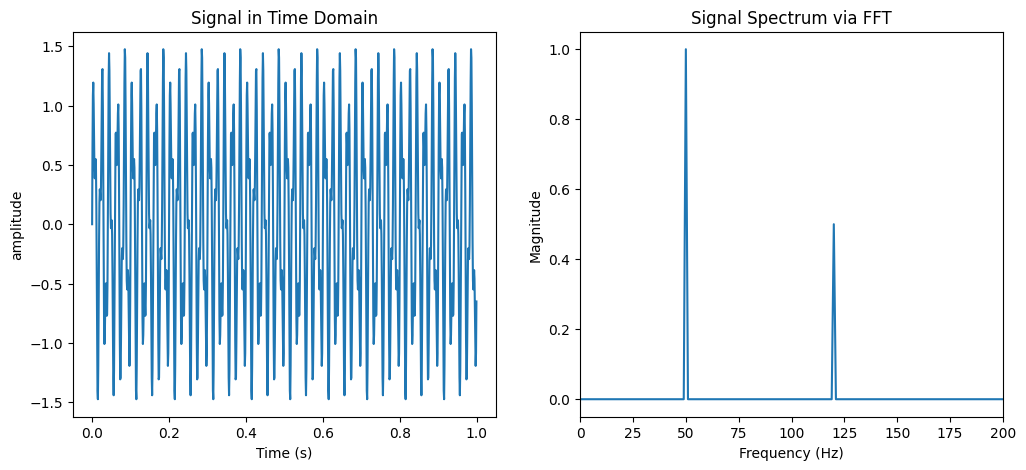

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

#Signal Parameters
sampling_rate = 1000
T = 1.0
N = int(sampling_rate * T)
t = np.linspace(0.0, T, N, endpoint=False)
pi = np.pi

#Signal with two frequencies: 50 HZ and 120 HZ
freq1 = 50
freq2 = 120
signal = np.sin(freq1 * 2.0 * pi * t) + 0.5 * np.sin(freq2 * 2.0 * pi * t)

## Compute THE FFT
signal_fft = np.fft.fft(signal)

## The FFT output is complex. Take absolute value for magnitude
## we only need first half of the array (N/2) due to symmetry
fft_magnitude = 2.0/N * np.abs(signal_fft[0:N//2])

# Frequeny Axis for the plot
freq_axis = np.fft.fftfreq(N, 1/sampling_rate)[:N//2]

# VIsualization
plt.figure(figsize=(12,5))

# time domain signal
plt.subplot(1,2,1)
plt.plot(t, signal)
plt.title("Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("amplitude")

# frequency domain signal (spectrum)
plt.subplot(1,2,2)
plt.plot(freq_axis, fft_magnitude)
plt.title("Signal Spectrum via FFT")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0,200) # Zoom in

plt.show()



## Expected Output
Should produce 2 plots
- Left: Complex waveform of our time signal over time
- Right: The frequency Spectrum, showing two distinct peaks at 50HZ and 120HZ as exactly how we created them   

## 🧠 Simple Explanation of the FFT Example

### 🎯 Goal
We create a signal that combines **two sine waves** — one at **50 Hz** and another at **120 Hz** —  
then use **FFT (Fast Fourier Transform)** to find out which frequencies are present.

---

### ⚙️ Step-by-Step Breakdown

1. **Setup**
   - `sampling_rate = 1000`: we record 1000 points per second.
   - `T = 1.0`: total duration is 1 second → 1000 samples.
   - `t`: time values from 0 to 1 second.

2. **Make the signal**
   ```python
   signal = sin(2π×50×t) + 0.5×sin(2π×120×t)
   -> we mixed two sine waves:
   - 50 Hz wave (big amplitude)
   - 120 Hz Wave (half the amplitude)
   🧩 So the waveform looks like a wiggly line — mostly 50 Hz with smaller ripples from 120 Hz.
3. **Compute the FFT**
- signal_fft = np.fft.fft(signal)
→ FFT turns the time signal → frequency signal, showing how much of each frequency is present.
4. **Get the Magnitude**<br>
fft_magnitude = 2.0/N * np.abs(signal_fft[0:N//2])<br>
freq_axis = np.fft.fftfreq(N, 1/sampling_rate)[:N//2]<br>
→ FFT gives complex numbers.
- Taking the absolute value gives the strength (magnitude) of each frequency.
- We only keep the first half (positive frequencies).

5. **Plot**


## 🧩 Example Summary

If you record a sound that’s a mix of two tones — say, a 50 Hz bass and a 120 Hz hum — 
FFT shows two spikes at 50 Hz and 120 Hz → confirming what frequencies your signal contains

## ✅ In short:

Time domain → shows how the signal looks over time.
Frequency domain (via FFT) → shows what frequencies make it up.